In [60]:
import pandas as pd
import numpy as np

Получение данных:

In [61]:
df = pd.read_csv('https://github.com/SergKostarev/ml_ensemble_learning/blob/main/heart.csv?raw=true')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Проверка наличия пропусков:

In [63]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
def get_hist(df, number_of_bins):
  ax = sns.histplot(df, bins=number_of_bins, kde=False, color='lightgreen', edgecolor='grey', stat='density')
  sns.kdeplot(df, color='darkblue', ax=ax)

In [66]:
def box_plot(column):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=column)
  plt.show()

Исследование выбросов:

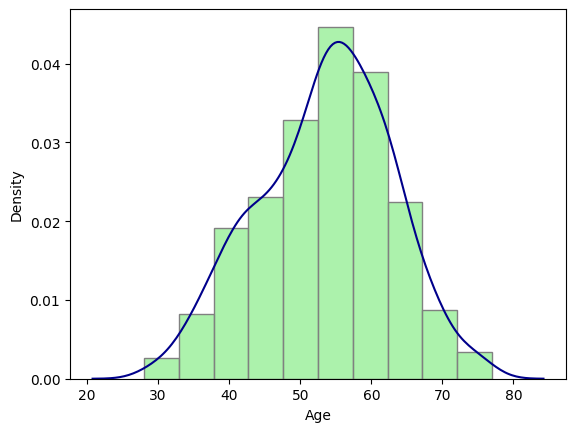

In [67]:
get_hist(df['Age'], 10)

In [68]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [69]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

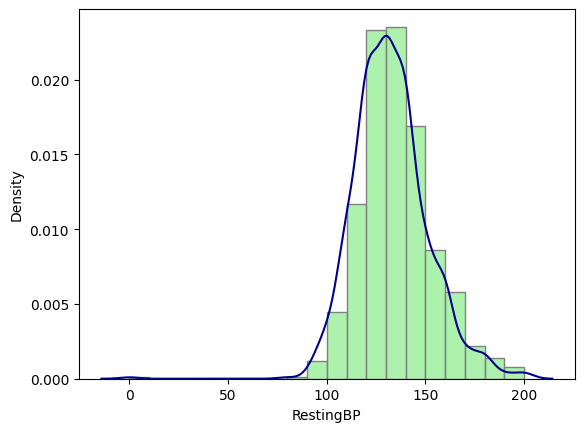

In [70]:
get_hist(df['RestingBP'], 20)

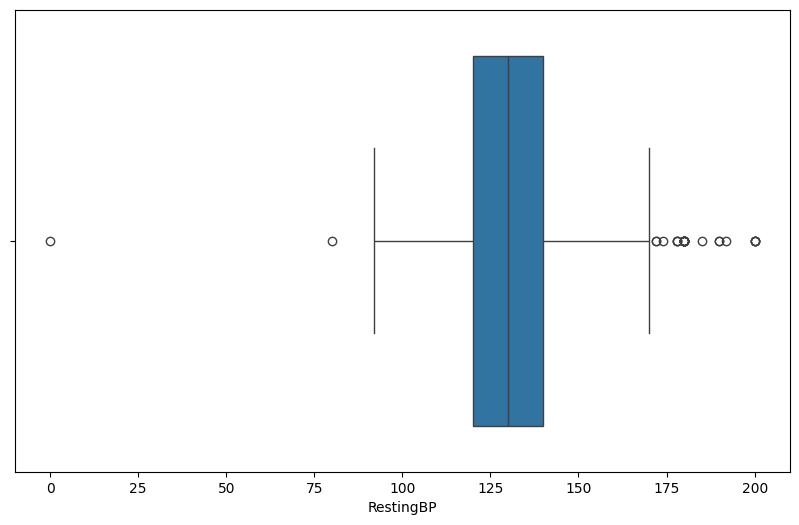

In [71]:
box_plot(df['RestingBP'])

In [72]:
df = df[df['RestingBP'] > 50]

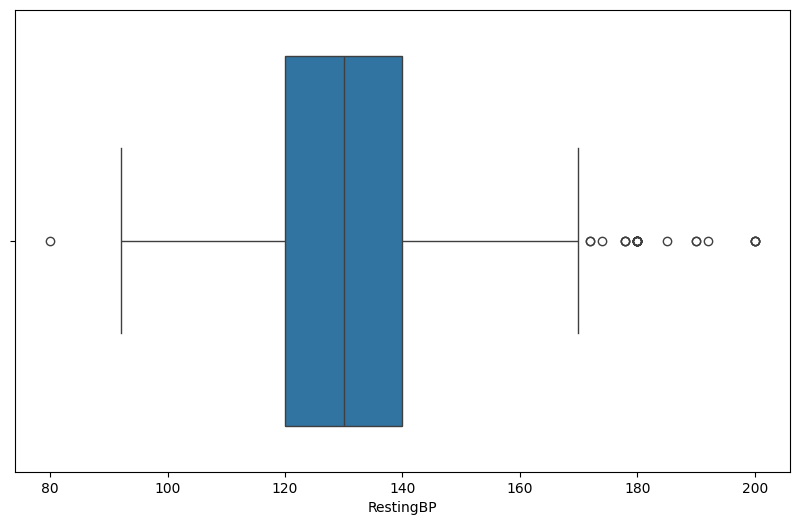

In [73]:
box_plot(df['RestingBP'])

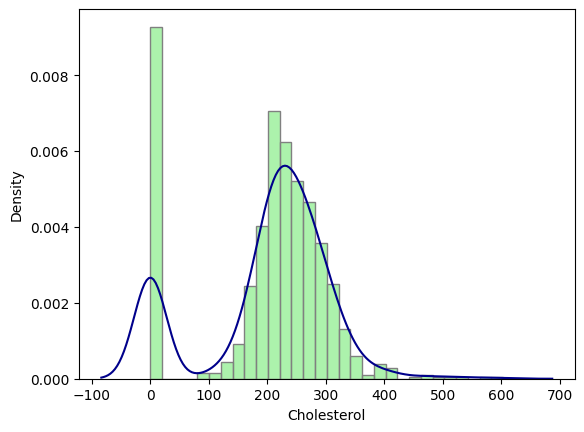

In [74]:
get_hist(df['Cholesterol'], 30)

In [75]:
df['Cholesterol'] = np.where(df['Cholesterol'] < 50, df['Cholesterol'][df['Cholesterol'] > 50].median(), df['Cholesterol'])

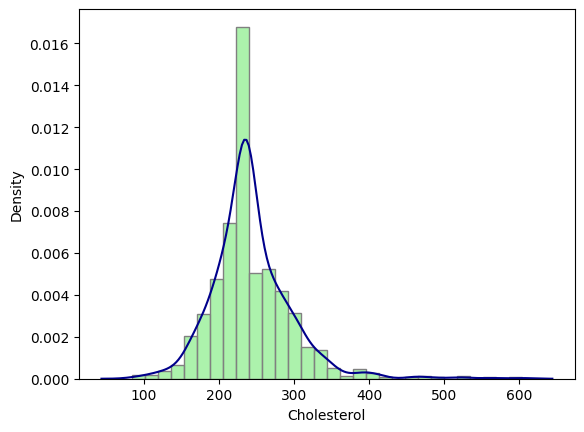

In [76]:
get_hist(df['Cholesterol'], 30)

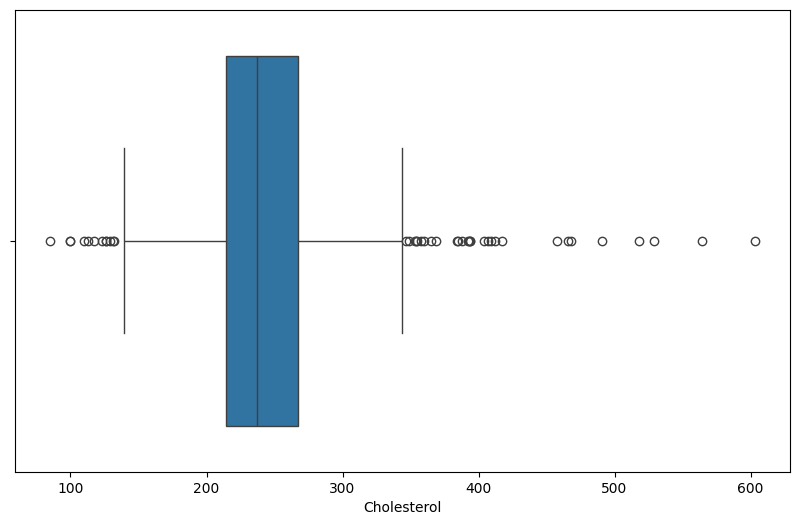

In [77]:
box_plot(df['Cholesterol'])

In [78]:
df['FastingBS'].unique()

array([0, 1])

In [79]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

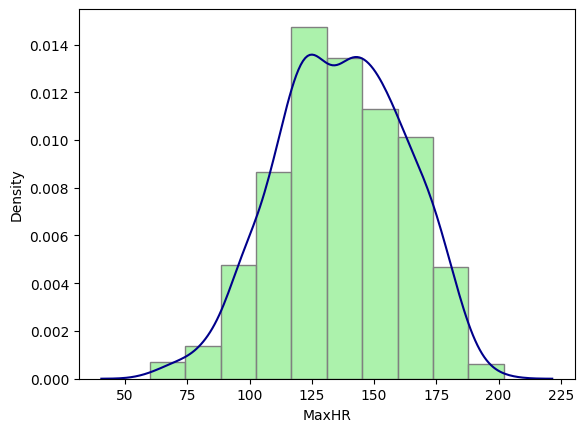

In [80]:
get_hist(df['MaxHR'], 10)

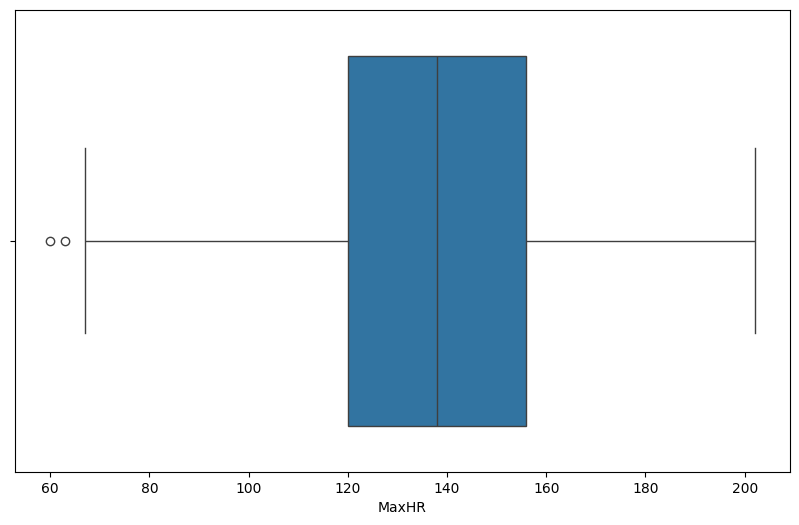

In [81]:
box_plot(df['MaxHR'])

In [82]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

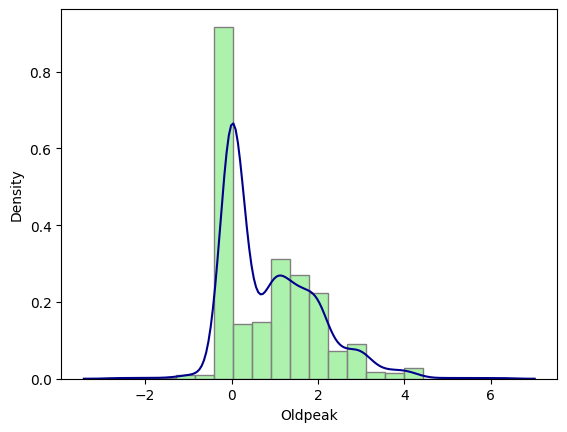

In [83]:
get_hist(df['Oldpeak'], 20)

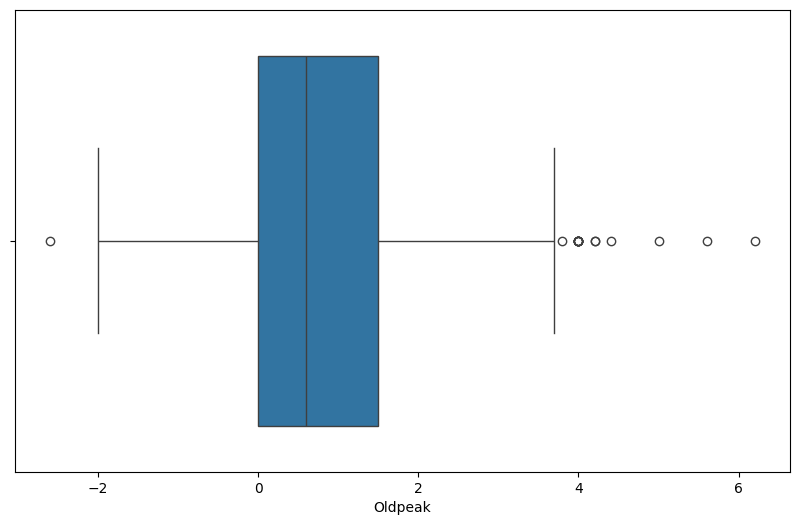

In [84]:
box_plot(df['Oldpeak'])

In [85]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [86]:
df['HeartDisease'].unique()

array([0, 1])

In [87]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,243.211559,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.430044,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Формирование набора признаков:

In [88]:
Y = df.loc[:, ['HeartDisease']]
X = pd.get_dummies(df.loc[:, df.columns != 'HeartDisease'], drop_first=True)

Корреляционная матрица признаков:

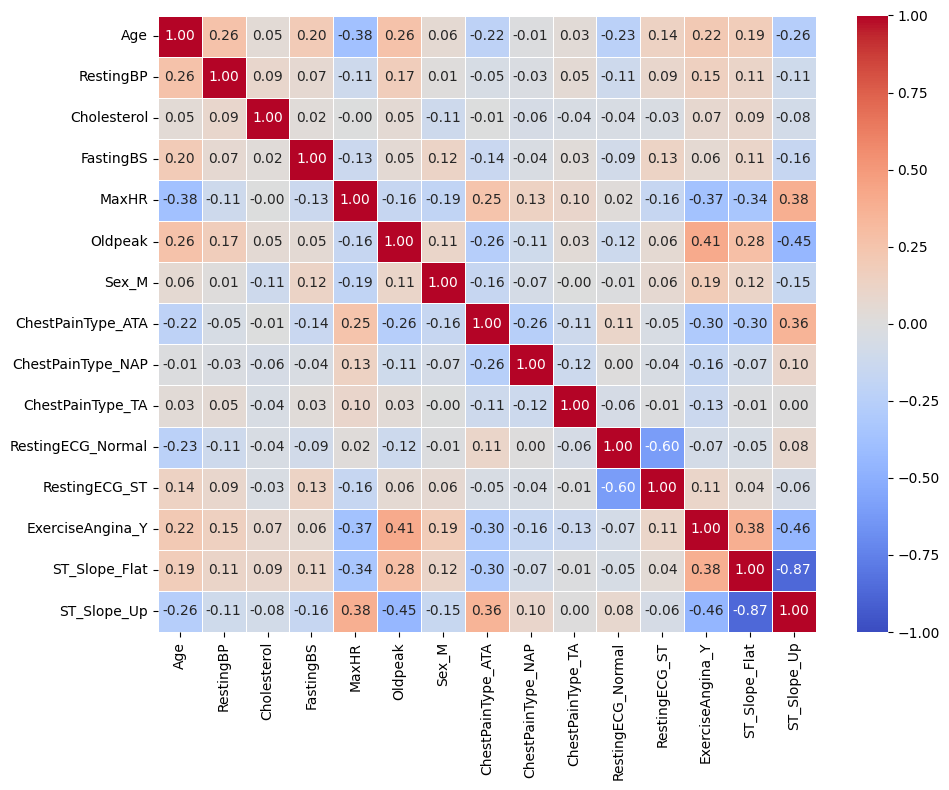

In [89]:
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt='.2f')
plt.tight_layout()
plt.show()

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Подбор максимальной глубины дерева решений:

In [92]:
tree_params = {'max_depth': range(1, 11)}
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)
tree_grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'max_depth': 3}

Дерево решений:

In [93]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        72
           1       0.88      0.84      0.86       112

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



In [94]:
from sklearn.ensemble import RandomForestClassifier

Случайный лес:

In [95]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
print(classification_report(y_test, clf_rf.predict(X_test)))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.86      0.83      0.85        72
           1       0.89      0.91      0.90       112

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



Определение наиболее информативных признаков:

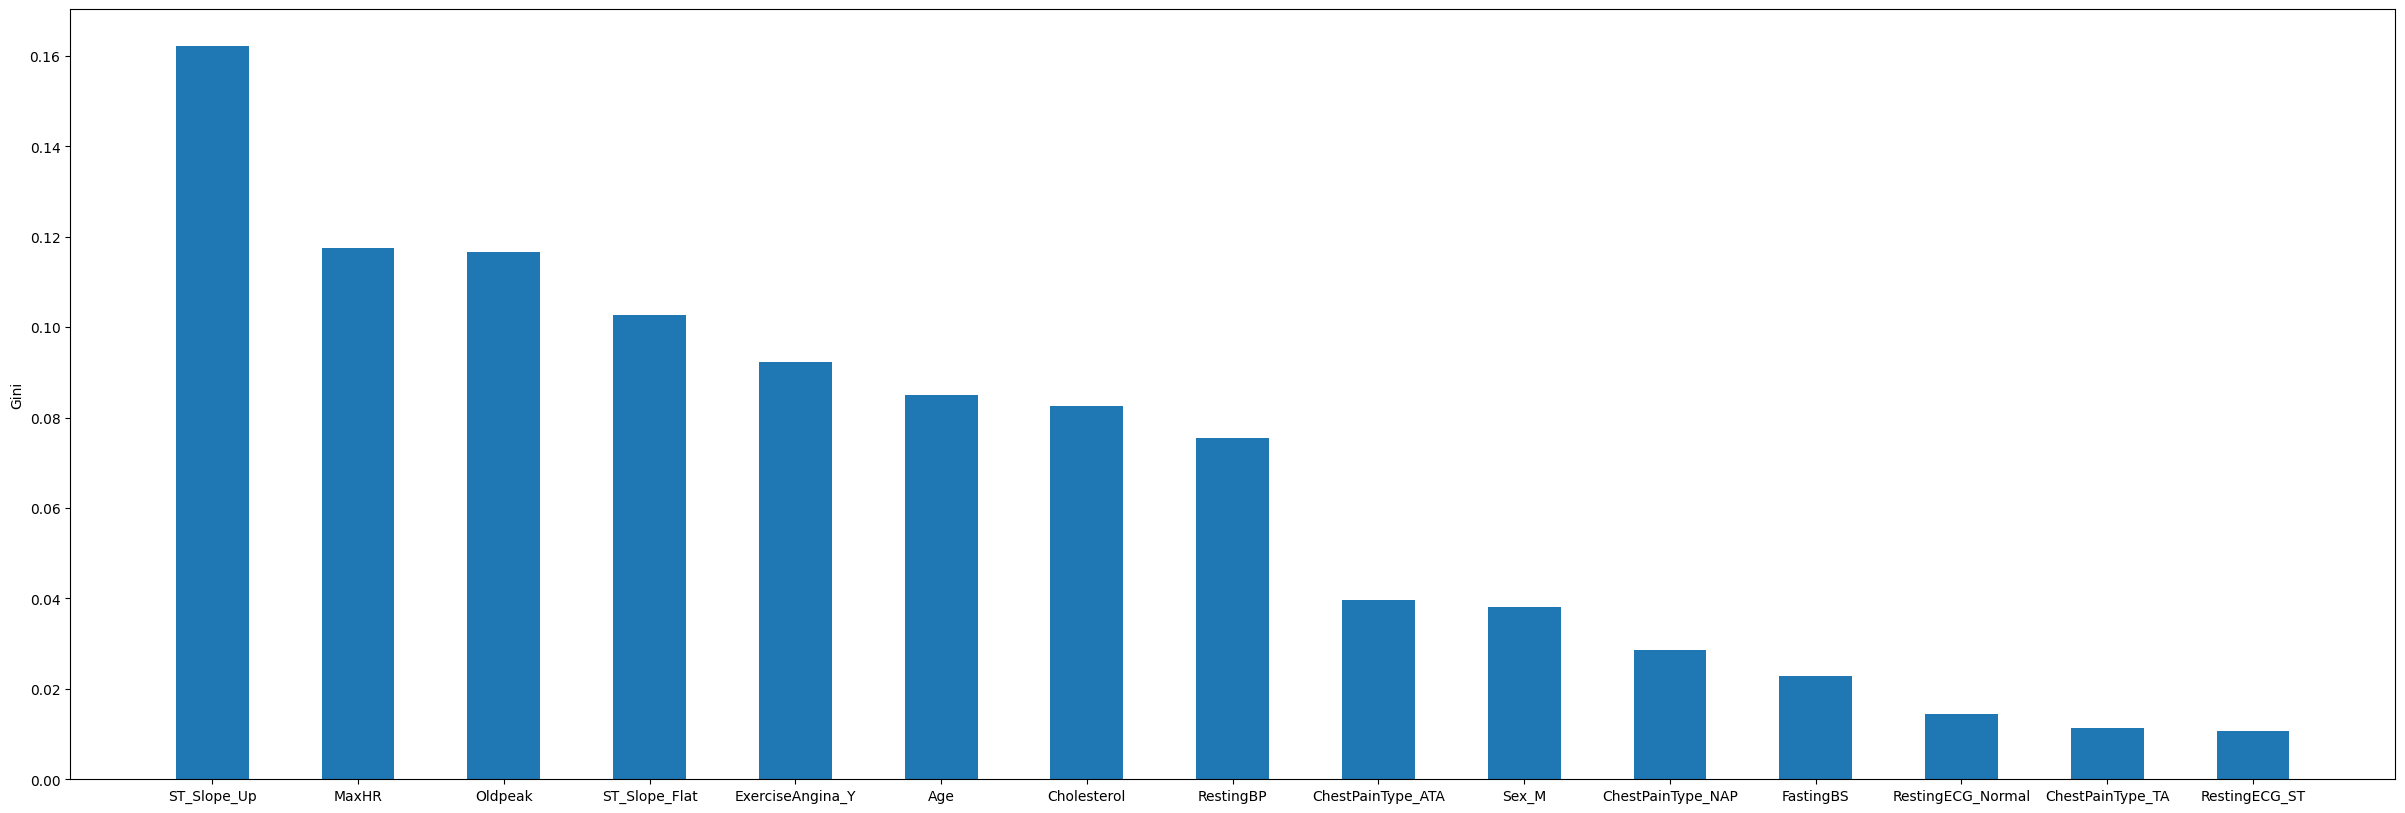

In [96]:
imp = pd.Series(clf_rf.feature_importances_)
imp.index = pd.Series(X_train.columns)
imp = imp.sort_values(ascending=False)
plt.figure(figsize=(30, 10))
plt.ylabel('Gini')
plt.bar(imp.index, imp, width=0.5)
plt.show()

Бэггинг:

In [97]:
from sklearn.ensemble import BaggingClassifier

In [98]:
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(),
                           n_estimators=10,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=42)

In [99]:
bagging.fit(X_train, y_train)
print(classification_report(y_test, bagging.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        72
           1       0.90      0.85      0.87       112

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVC

 Метод опорных векторов:

In [101]:
linear_svc = LinearSVC(random_state=42)
linear_svc.fit(X_train, y_train)
print(classification_report(y_test, linear_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        72
           1       0.92      0.86      0.89       112

    accuracy                           0.87       184
   macro avg       0.86      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Стекинг:

In [102]:
stc = StackingClassifier(estimators=[
        ('LinearSVC', linear_svc),
        ('RandomForestClassifier', clf_rf),
        ('DecisionTreeClassifier', clf)
        ])
stc.fit(X_train, y_train)
print(classification_report(y_test, stc.predict(X_test)))

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


              precision    recall  f1-score   support

           0       0.81      0.89      0.85        72
           1       0.92      0.87      0.89       112

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



Рассмотрены различные варианты моделей машинного обучения для задачи прогнозирования наличия заболеваний сердца. Выполнен предварительный анализ данных: проверка наличия пропусков, построение гистограмм распределения для непрерывных признаков и анализ значений категориальных признаков, а также удаление выбросов.

| Модель         | Pr0   | Pr1   | R0    | R1    |
| :--------------|------:|------:|------:|------:|
| Дерево решений | 0,77  | 0,88  | 0,82  | 0,84  |
| Случайный лес  | 0,86  | 0,89  | 0,83  | 0,91  |
| Бэггинг        | 0,78  | 0,90  | 0,85  | 0,85  |
| SVM            | 0,80  | 0,92  | 0,89  | 0,86  |
| Стекинг        | 0,81  | 0,92  | 0,89  | 0,87  |

Из таблицы видно, что наилучшие результаты показал ансамбль методов (стекинг), а также метод опорных векторов. Для обоих методов точность (precision) составляет приблизительно 0,80 и 0,92 для отсутствия и наличия заболевания соответственно. Полнота (recall) для двух классов равна 0,89 и 0,86. Дерево решений и бэггинг показывают более низкое качество прогнозов.
Следует отметить, что полнота для класса 1 (наличие заболевания), которая, вероятно, является наиболее важной метрикой в рассматриваемом случае, для всех рассмотренных моделей остается на высоком уровне. При этом метод случайного леса со значением 0,91 превосходит стекинг , но дает несколько большее число ложных тревог (критерий Pr1) для наличия заболевания.
Таким образом, стекинг лучше остальных моделей по совокупности критериев, но, учитывая цели исследования, нельзя сделать однозначный вывод о превосходстве данного метода. Очень хорошие результаты показал также метод опорных векторов и метод случайного леса для полноты прогноза наличия заболевания сердца.